## Load data

In [2]:
# Import library
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
# Load data
data = pd.read_csv('emails.csv')
# Rename names columns 
data.columns = ['email', 'label']

In [3]:
print(len(data))

5728


In [4]:
data.head()

,email,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5728 non-null   object
 1   label   5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
print('결측값 여부 :', data.isnull().values.any())

결측값 여부 : False


In [7]:
print('corpus의 유니크한 값 :',data['email'].nunique())

corpus의 유니크한 값 : 5695


In [8]:
# test 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['email'], inplace=True)

In [9]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5695


<AxesSubplot:>

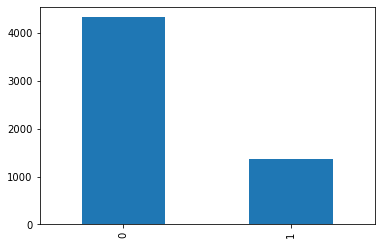

In [10]:
data['label'].value_counts().plot(kind='bar')

In [11]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('label').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   label  count
0      0   4327
1      1   1368


In [12]:
print(f'정상 메일의 비율 = {round(data["label"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["label"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일의 비율 = 75.979%
스팸 메일의 비율 = 24.021%


In [13]:
X_data = data['email']
y_data = data['label']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5695
레이블의 개수: 5695


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

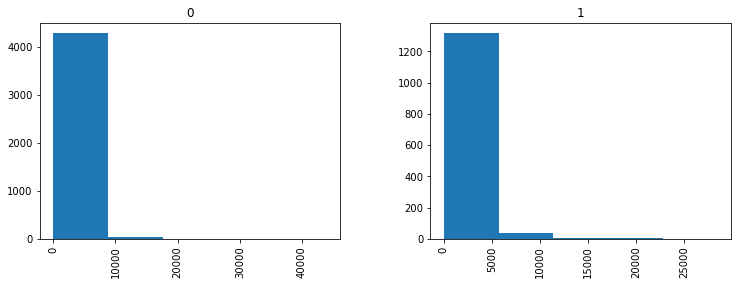

In [14]:
data["length"] = data["email"].apply(len)
data.sort_values(by='length', ascending=False).head(10)

data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [15]:
import re
data['email'] = data['email'].apply(lambda x : re.sub(r'[\n\t]+', ' ', x))

In [16]:
data['email'] = data['email'].apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x))

In [17]:
data['email'] = data['email'].apply(lambda x:x.strip())
data['emil'] = data['email'].apply(lambda x:x.lower())

In [24]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    filtered_tokens = [token for token in word_tokenize(text) if token not in stopwords.words('english')]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [25]:
data['email'] = data['email'].apply(remove_stopwords)

In [26]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    stemmed_tokens = [stemmer.stem(token) for token in word_tokenize(text)]
    stemmed_text = ' '.join(stemmed_tokens)
    return stemmed_text

In [27]:
data['email'] = data['email'].apply(stemming)

In [29]:
X_data = data['email']
y_data = data['label']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5695
레이블의 개수: 5695


## countVectorizer

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorization = CountVectorizer()
train_features = vectorization.fit_transform(X_train)

In [32]:
print(train_features)

  (0, 19414)	3
  (0, 1204)	8
  (0, 749)	8
  (0, 19528)	7
  (0, 17714)	7
  (0, 14741)	6
  (0, 15341)	4
  (0, 16535)	1
  (0, 7448)	4
  (0, 12639)	3
  (0, 16725)	2
  (0, 15933)	3
  (0, 4122)	1
  (0, 5157)	1
  (0, 4779)	6
  (0, 11568)	2
  (0, 18381)	1
  (0, 2294)	1
  (0, 10328)	2
  (0, 12783)	1
  (0, 22417)	2
  (0, 990)	2
  (0, 20140)	3
  (0, 7550)	1
  (0, 10333)	2
  :	:
  (4555, 5200)	1
  (4555, 13725)	1
  (4555, 14985)	1
  (4555, 16792)	1
  (4555, 11512)	1
  (4555, 10031)	1
  (4555, 18070)	1
  (4555, 19487)	1
  (4555, 457)	1
  (4555, 8756)	1
  (4555, 18219)	1
  (4555, 9610)	1
  (4555, 21949)	1
  (4555, 19599)	1
  (4555, 1719)	1
  (4555, 15325)	1
  (4555, 12937)	2
  (4555, 12952)	1
  (4555, 16268)	1
  (4555, 17014)	1
  (4555, 14452)	1
  (4555, 4155)	1
  (4555, 9297)	1
  (4555, 18146)	1
  (4555, 4536)	1


In [33]:
test_features = vectorization.transform(X_test)

In [34]:
print(test_features)

  (0, 47)	3
  (0, 176)	1
  (0, 869)	1
  (0, 1137)	1
  (0, 3719)	1
  (0, 4410)	4
  (0, 4871)	1
  (0, 7448)	1
  (0, 8417)	1
  (0, 8867)	1
  (0, 9673)	1
  (0, 10908)	1
  (0, 11407)	1
  (0, 12963)	4
  (0, 13517)	1
  (0, 13613)	1
  (0, 14136)	1
  (0, 14325)	1
  (0, 14473)	1
  (0, 15341)	1
  (0, 15531)	1
  (0, 16291)	1
  (0, 16318)	1
  (0, 16725)	1
  (0, 16942)	1
  :	:
  (1138, 4422)	1
  (1138, 4811)	1
  (1138, 5924)	1
  (1138, 6409)	1
  (1138, 6410)	2
  (1138, 8342)	1
  (1138, 8850)	1
  (1138, 9764)	1
  (1138, 10260)	2
  (1138, 10645)	2
  (1138, 10663)	1
  (1138, 12854)	1
  (1138, 13381)	1
  (1138, 15341)	2
  (1138, 15388)	1
  (1138, 15850)	1
  (1138, 16741)	1
  (1138, 16923)	1
  (1138, 18264)	1
  (1138, 19414)	1
  (1138, 19993)	1
  (1138, 20140)	1
  (1138, 20321)	1
  (1138, 20736)	2
  (1138, 21625)	2


In [35]:
from sklearn.model_selection import cross_val_score

### Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
mnb = MultinomialNB()

In [38]:
mnb.fit(train_features, y_train)

MultinomialNB()

In [39]:
mnb_cv_score = cross_val_score(mnb, train_features, y_train, cv = 5)

In [40]:
mnb_cv_score

array([0.9879386 , 0.98572997, 0.98353458, 0.99121844, 0.98792536])

In [41]:
mnb_cv_score.mean()

0.9872693877944038

In [42]:
mnb_test_score = mnb.score(test_features, y_test)

In [43]:
mnb_test_score

0.990342405618964

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression(max_iter = 1000)

In [46]:
lr.fit(train_features, y_train)

LogisticRegression(max_iter=1000)

In [47]:
lr_cv_score = cross_val_score(lr, train_features, y_train, cv = 5)

In [48]:
lr_cv_score

array([0.99013158, 0.99012075, 0.98792536, 0.98463227, 0.98463227])

In [49]:
lr_cv_score.mean()

0.9874884453174648

In [50]:
lr_test_score = lr.score(test_features, y_test)

In [51]:
lr_test_score

0.990342405618964

### SVM (Support Vector Machine)

In [52]:
from sklearn.svm import LinearSVC

In [53]:
svm = LinearSVC(max_iter = 100000, random_state = 42)

In [54]:
svm.fit(train_features, y_train)

LinearSVC(max_iter=100000, random_state=42)

In [55]:
svm_cv_score = cross_val_score(svm, train_features, y_train, cv = 5)

In [56]:
svm_cv_score

array([0.98574561, 0.98353458, 0.98463227, 0.9791438 , 0.9780461 ])

In [57]:
svm_cv_score.mean()

0.9822204729716718

In [58]:
svm_test_score = svm.score(test_features,y_test)

In [59]:
svm_test_score

0.9885864793678666

## Classification Models with TF-IDF Features

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf = TfidfVectorizer()

In [62]:
train_features = tfidf.fit_transform(X_train)

In [63]:
train_features

<4556x22934 sparse matrix of type '<class 'numpy.float64'>'
	with 376354 stored elements in Compressed Sparse Row format>

In [64]:
test_features = tfidf.transform(X_test)

In [65]:
test_features

<1139x22934 sparse matrix of type '<class 'numpy.float64'>'
	with 93137 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [66]:
mnb = MultinomialNB()

In [67]:
mnb.fit(train_features, y_train)

MultinomialNB()

In [68]:
mnb_cv_score = cross_val_score(mnb, train_features, y_train, cv = 5)

In [69]:
mnb_cv_score

array([0.88377193, 0.89681668, 0.89023052, 0.88254665, 0.8715697 ])

In [70]:
mnb_cv_score.mean()

0.8849870972711692

In [71]:
mnb_test_score = mnb.score(test_features, y_test)

In [72]:
mnb_test_score

0.9016681299385426

### Logistic regression

In [73]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_features, y_train)

LogisticRegression(max_iter=1000)

In [74]:
lr_cv_score = cross_val_score(lr, train_features, y_train, cv= 5)

In [75]:
lr_cv_score

array([0.97916667, 0.98133919, 0.97145993, 0.9780461 , 0.98353458])

In [76]:
lr_cv_score.mean()

0.9787092938163191

In [77]:
lr_test_score = lr.score(test_features, y_test)
lr_test_score

0.9885864793678666

### SVM(support vector machine)

In [78]:
svm = LinearSVC(max_iter = 100000, random_state =42)
svm.fit(train_features, y_train)

LinearSVC(max_iter=100000, random_state=42)

In [79]:
svm_cv_score = cross_val_score(svm, train_features, y_train, cv=5)

In [80]:
svm_cv_score

array([0.99342105, 0.99341383, 0.98902305, 0.99012075, 0.99451153])

In [81]:
svm_cv_score.mean()

0.9920980414813103

In [82]:
svm_test_score = svm.score(test_features, y_test)
svm_test_score

0.9947322212467077

## Confusion matrix

In [83]:
# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

C:\Users\82103\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


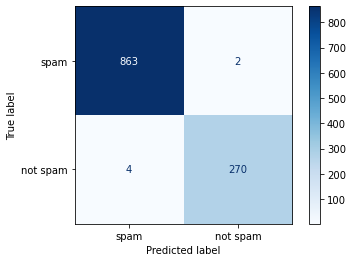

In [92]:
import matplotlib.pyplot as plt
label=['spam', 'not spam'] # 라벨 설정
plot = plot_confusion_matrix(svm, # 분류 모델
                             test_features, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None